In [18]:
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import os

In [19]:
plt.rc('figure', autolayout=True)
plt.rc('image', cmap='magma')

In [20]:
image_paths = [ r'C:\Users\Sakthiyogesh\OneDrive\Desktop\bird dataset\pexels-nord6-792416.jpg',
                r'C:\Users\Sakthiyogesh\OneDrive\Desktop\bird dataset\pexels-ashuphotography-1406506.jpg',
                r'C:\Users\Sakthiyogesh\OneDrive\Desktop\bird dataset\pexels-daniyal-ghanavati-10741-110812.jpg',
                r'C:\Users\Sakthiyogesh\OneDrive\Desktop\bird dataset\pexels-pixabay-45853.jpg',
                r'C:\Users\Sakthiyogesh\OneDrive\Desktop\bird dataset\pexels-pixabay-416179.jpg'
              ]

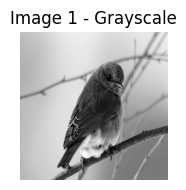

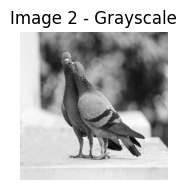

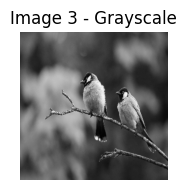

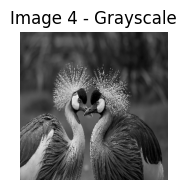

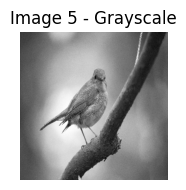

In [21]:
for i, path in enumerate(image_paths):
    image = tf.io.read_file(path)
    image = tf.io.decode_jpeg(image, channels=1)  # Convert to grayscale
    image = tf.image.resize(image, size=[300, 300])
    img = tf.squeeze(image).numpy()

    # Display the image
    plt.figure(figsize=(2, 2))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f'Image {i+1} - Grayscale')
    plt.show()


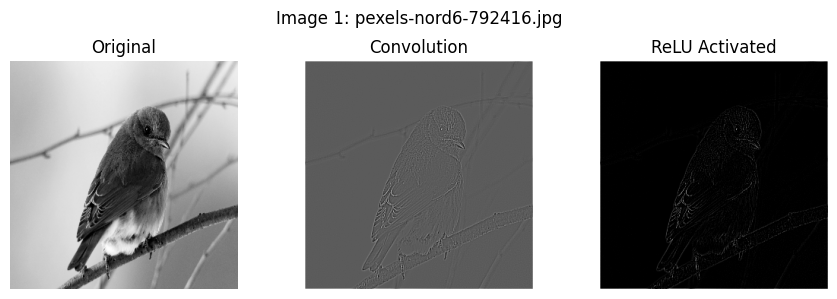

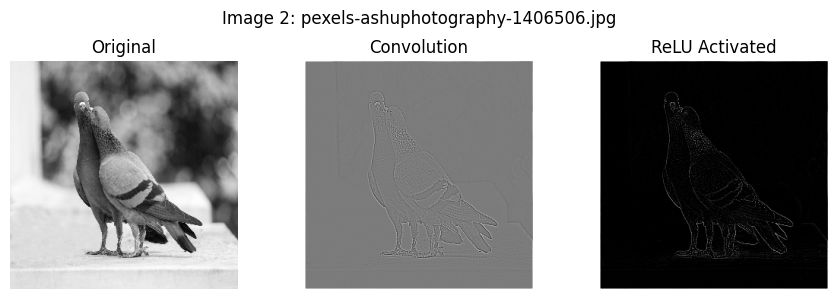

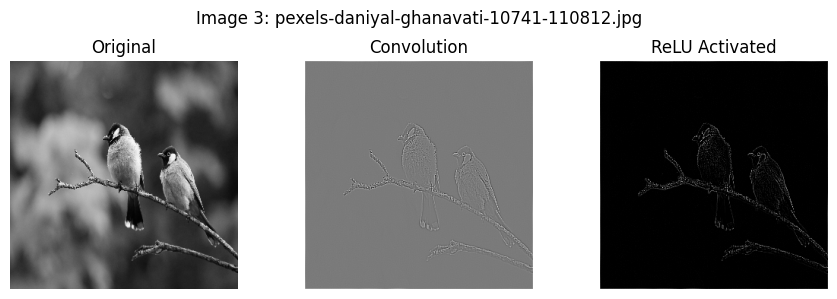

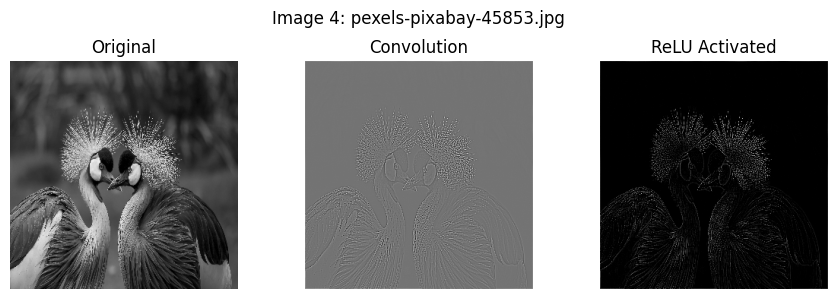

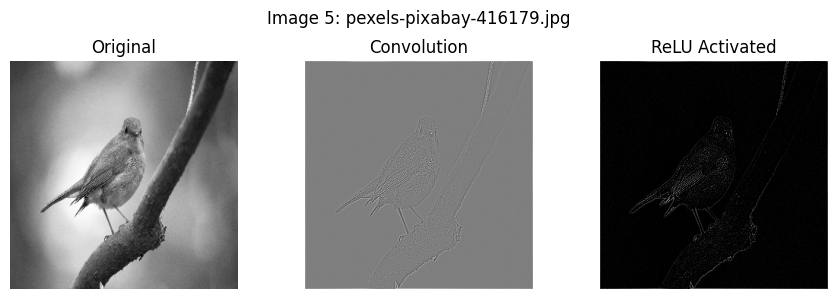

In [22]:
kernel = tf.constant([
    [[[-1.0]], [[-1.0]], [[-1.0]]],
    [[[-1.0]], [[ 8.0]], [[-1.0]]],
    [[[-1.0]], [[-1.0]], [[-1.0]]]
], dtype=tf.float32)  # shape (3,3,1,1)

# ✅ 3️⃣ Loop through each image and process
for i, path in enumerate(image_paths, start=1):
    # Load and preprocess image
    image_raw = tf.io.read_file(path)
    image = tf.io.decode_jpeg(image_raw, channels=1)
    image = tf.image.resize(image, [300, 300])
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.expand_dims(image, axis=0)  # Add batch dimension

    # Apply convolution and ReLU
    conv_output = tf.nn.conv2d(image, filters=kernel, strides=1, padding='SAME')
    relu_output = tf.nn.relu(conv_output)

    # Plotting
    plt.figure(figsize=(9, 3))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(tf.squeeze(image), cmap='gray')
    plt.title('Original')
    plt.axis('off')

    # Convolution output (normalized for display)
    plt.subplot(1, 3, 2)
    conv_display = tf.squeeze(conv_output)
    conv_display = (conv_display - tf.reduce_min(conv_display)) / (tf.reduce_max(conv_display) - tf.reduce_min(conv_display) + 1e-8)
    plt.imshow(conv_display, cmap='gray')
    plt.title('Convolution')
    plt.axis('off')

    # ReLU activated output
    plt.subplot(1, 3, 3)
    plt.imshow(tf.squeeze(relu_output), cmap='gray')
    plt.title('ReLU Activated')
    plt.axis('off')

    plt.suptitle(f'Image {i}: {os.path.basename(path)}')
    plt.tight_layout()
    plt.show()

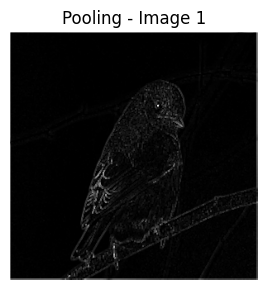

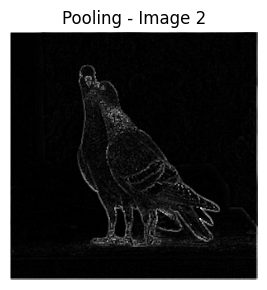

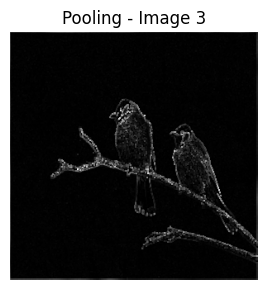

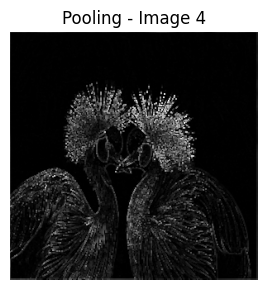

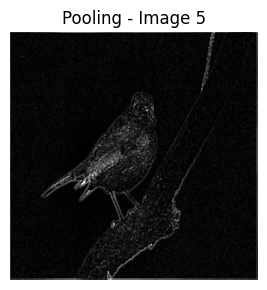

In [23]:
# Loop through each image
for i, path in enumerate(image_paths, start=1):
    # Load and preprocess image
    image_raw = tf.io.read_file(path)
    image = tf.io.decode_jpeg(image_raw, channels=1)
    image = tf.image.resize(image, [300, 300])
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.expand_dims(image, axis=0)  # Add batch dimension

    # Apply convolution
    conv_output = tf.nn.conv2d(image, filters=kernel, strides=1, padding='SAME')

    # Apply ReLU activation
    image_detect = tf.nn.relu(conv_output)

    # Apply max pooling
    image_condense = tf.nn.pool(
        input=image_detect,
        window_shape=(2, 2),
        pooling_type='MAX',
        strides=(1, 1),
        padding='SAME'
    )

    # Plot pooled output
    plt.figure(figsize=(3, 3))
    plt.imshow(tf.squeeze(image_condense), cmap='gray')
    plt.axis('off')
    plt.title(f'Pooling - Image {i}')
    plt.tight_layout()
    plt.show()


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2500 - loss: 1.5554WARNING:tensorflow:5 out of the last 14 calls to <function TensorFlowTrainer._make_function.<locals>.multi_step_on_iterator at 0x000002B23A935C60> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.2500 - loss: 1.5554 - val_accuracy: 0.0000e+00 - val_loss: 6.1210
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.5000 - loss: 0.8400 - val_ac

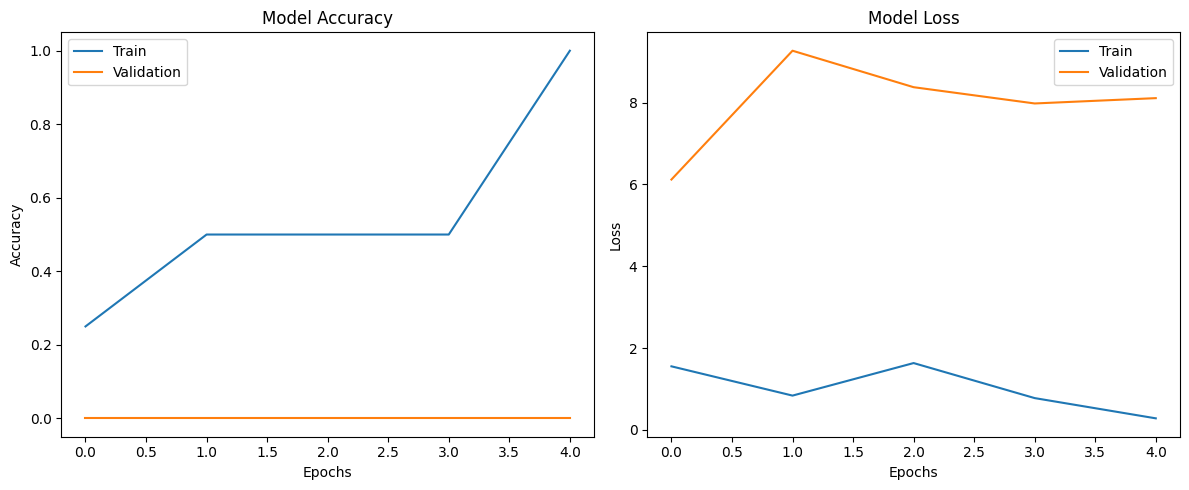

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


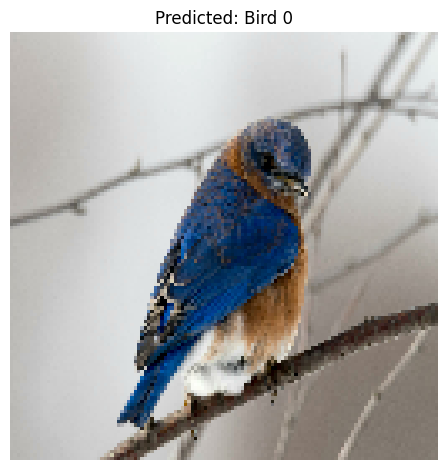

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


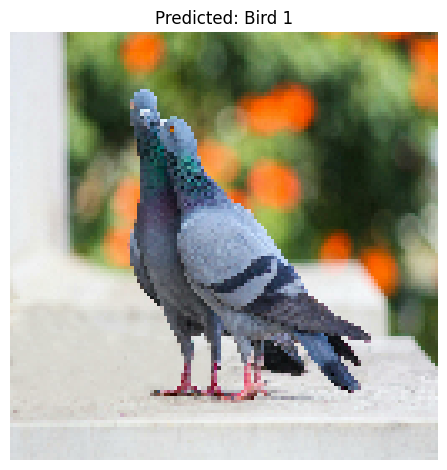

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


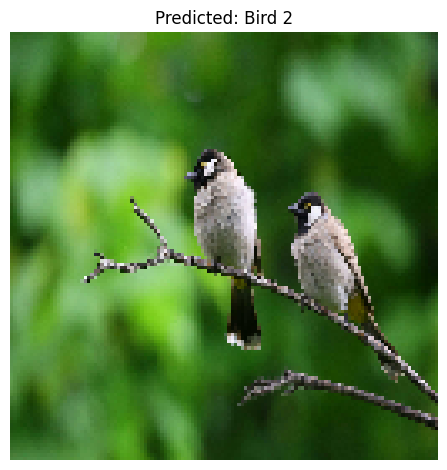

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


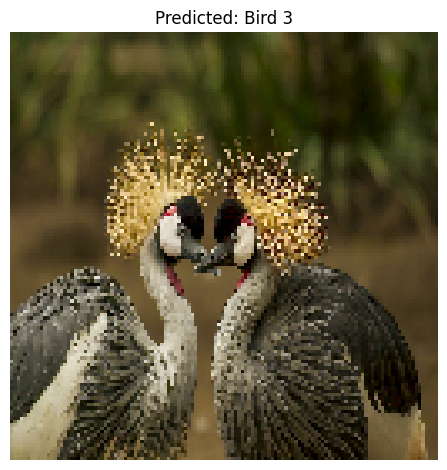

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


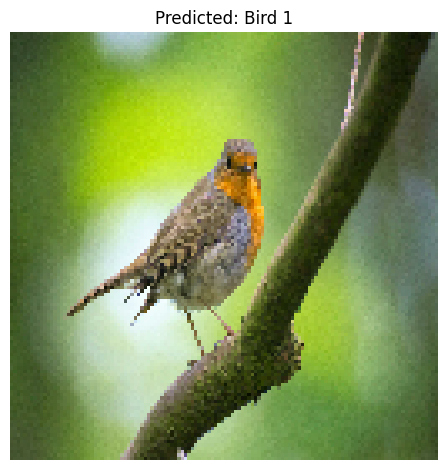

In [27]:
# ✅ 1️⃣ Example image paths (replace with your actual image paths)
image_paths = [ r'C:\Users\Sakthiyogesh\OneDrive\Desktop\bird dataset\pexels-nord6-792416.jpg',
                r'C:\Users\Sakthiyogesh\OneDrive\Desktop\bird dataset\pexels-ashuphotography-1406506.jpg',
                r'C:\Users\Sakthiyogesh\OneDrive\Desktop\bird dataset\pexels-daniyal-ghanavati-10741-110812.jpg',
                r'C:\Users\Sakthiyogesh\OneDrive\Desktop\bird dataset\pexels-pixabay-45853.jpg',
                r'C:\Users\Sakthiyogesh\OneDrive\Desktop\bird dataset\pexels-pixabay-416179.jpg'    
]

# ✅ Parameters
IMG_HEIGHT, IMG_WIDTH = 128, 128

# ✅ 1️⃣ Load and preprocess all images
images = []
for path in image_paths:
    img = tf.io.read_file(path)
    img = tf.io.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])
    img = img / 255.0
    images.append(img)

images = tf.stack(images).numpy()

# Dummy labels (replace with actual labels if known)
labels = np.array([0, 1, 2, 3, 4])  # One label per bird
num_classes = len(np.unique(labels))

# Split train/test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=32)

# Convert labels to categorical (one-hot)
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# ✅ 2️⃣ Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# ✅ 3️⃣ Train briefly
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# ✅ 4️⃣ Evaluate model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# ✅ 5️⃣ Plot Accuracy and Loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# ✅ 6️⃣ Visualize predictions for all images
class_names = [f"Bird {i}" for i in range(num_classes)]
for i, path in enumerate(image_paths):
    img = tf.io.read_file(path)
    img = tf.io.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])
    img = img / 255.0
    img_array = tf.expand_dims(img, axis=0)

    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]

    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()